Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,3.244435,2.922476,0.413010,00:07


epoch,train_loss,valid_loss,accuracy,time
0,2.688430,2.642395,0.464456,00:09
1,2.436579,2.525491,0.479634,00:09
2,2.186449,2.507713,0.484269,00:09


What is a patent? The patent holder can amend patent claims during the litigation and the patent ; and the patent owner can also claim patent infringement . However , the Federal Patent Court has the authority to stop


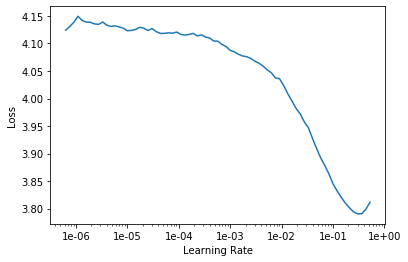

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
from google.colab import drive
drive.mount('/content/drive')

path= Path('/content/drive/My Drive/data/qa')
path.ls()

bs =64
data_lm = (TextList.from_folder(path)[0:1000]
           #Inputs: all the text files in path
            .filter_by_folder(include=['train']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')


learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.lr_find()
learn.recorder.plot(skip_end=15)
learn.fit_one_cycle(1, 1e-2, moms=(0.8, 0.7))
learn.save('fit_head')
learn.load('fit_head');
#to complete fine-tuning, unfreeze and launch a new training
learn.unfreeze()
learn.fit_one_cycle(3, 1e-3, moms=(0.8, 0.7)) #todo default 10
learn.save('fine_tuned')
learn.load('fine_tuned')
TEXT="What is a patent?"
N_WORDS = 40
N_SENTENCES=1
learn.export(file=Path('/content/drive/My Drive/data/qa/legal_qa_text_generator_lstm_v1_export.pkl'))
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))
learn.save_encoder('fine_tuned_enc')

In [0]:

TEXT="How do I secure a trademark?"
N_WORDS = 40
N_SENTENCES=2
learn = load_learner(Path('/content/drive/My Drive/data/qa'),'legal_qa_text_generator_lstm_v1_export.pkl')

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


How do I secure a trademark? Is it advisable to send a letter before action ? The use of a letter of intent is not compulsory . However , the Dutch Civil Code provides that the Dutch court will
How do I secure a trademark? In China , a trade mark is protected as a trade mark . The registration of a trade mark in China is effective against third parties and registration of the trade mark is usually carried out


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


(Category finance,
 tensor(31),
 tensor([0.0118, 0.0188, 0.0131, 0.0171, 0.0123, 0.0090, 0.0111, 0.0158, 0.0131,
         0.0114, 0.0125, 0.0088, 0.0096, 0.0108, 0.0080, 0.0114, 0.0109, 0.0100,
         0.0113, 0.0152, 0.0175, 0.0131, 0.0141, 0.0162, 0.0130, 0.0161, 0.0136,
         0.0136, 0.0096, 0.0157, 0.0129, 0.0214, 0.0100, 0.0091, 0.0111, 0.0089,
         0.0094, 0.0144, 0.0109, 0.0093, 0.0140, 0.0104, 0.0122, 0.0116, 0.0140,
         0.0117, 0.0156, 0.0114, 0.0184, 0.0120, 0.0182, 0.0181, 0.0152, 0.0117,
         0.0141, 0.0155, 0.0113, 0.0075, 0.0146, 0.0161, 0.0136, 0.0101, 0.0138,
         0.0111, 0.0124, 0.0122, 0.0140, 0.0147, 0.0116, 0.0101, 0.0119, 0.0137,
         0.0099, 0.0139, 0.0109, 0.0148, 0.0118, 0.0141]))

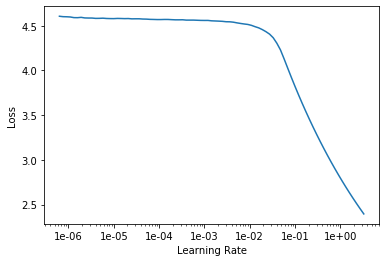

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.text import *
from google.colab import drive
drive.mount('/content/drive')
data_lm = load_data(path,'data_lm.pkl', bs=bs) 
#Classifier
path= Path('/content/drive/My Drive/data/qa')
bs=64
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
            
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['acquisition_finance', 'agricultural_law', 'arbitration', 'aviation_finance', 'banking_regulation', 'brexit_cross-border_mergers', 'business_crime_and_investigations', 'business_immigration', 'cartel_leniency', 'charity', 'class_actions', 'commercialisation_of_healthcare', 'communications_regulation_and_outsourcing', 'construction_and_projects', 'copyright_litigation', 'corporate_governance_and_directors_duties', 'corporate_real_estate', 'debt_capital_markets', 'digital_business', 'dispute_resolution', 'distribution_and_marketing_of_drugs', 'doing_business_in', 'electricity_regulation', 'employee_share_plans', 'employment_and_employee_benefits', 'enforcement_of_judgments_and_arbitral_awards', 'environment', 'equity_capital_markets', 'establishing_a_business_in', 'establishing_a_financial_institution_in', 'family', 'finance', 'financial_and_business_crime', 'franchising', 'gaming', 'hedge_funds', 'insolvency_and_directors_duties', 'insurance_and_reinsurance', 'international_relocation_of_children', 'international_trade_in_goods_and_services', 'investing_in', 'ip_in_business_transactions', 'joint_ventures', 'legal_systems', 'major_projects_environmental_risks', 'medicinal_product_regulation_and_product_liability', 'merger_control', 'mining_regulation', 'oil_and_gas_regulation', 'outsourcing', 'patent_litigation', 'patents_trademarks_copyright_and_designs', 'pensions', 'pharmaceutical_ip_and_competition_law', 'privacy', 'private_antitrust_litigation', 'private_client', 'private_equity', 'private_mergers_and_acquisitions', 'product_liability', 'product_liability', 'project_finance', 'public_mergers_and_acquisitions', 'regulation_of_the_legal_profession', 'restraints_of_trade_and_dominance', 'restructuring_and_insolvency', 'retail_investment_funds', 'sale_and_storage_of_goods', 'shareholder_activism', 'shareholders_rights_in_private_and_public_companies', 'structured_finance_and_securitisation', 'tax_litigation', 'tax_on_corporate_transactions', 'tax_on_finance_transactions', 'trade_mark_litigation', 'transfer_pricing', 'transferring_employees_on_an_outsourcing', 'venture_capital'])
             #label them all with their folders
             .databunch(bs=bs))
data_clas.save('data_clas.pkl')
data_clas = load_data(path, 'data_clas.pkl', bs=bs)
#data_clas.show_batch()
#creatae a model to classify those reviews and load the encoder we saved before
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 2e-2, moms=(.8, .7))
learn.save('first')
learn.load('first');
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn.save('second')
learn.load('second')
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))
learn.save('third')
learn.load('third')
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn.export(file=Path('/content/drive/My Drive/data/legal_qa_text_classifier_lstm_v1_export.pkl'))
learn.predict("How do I secure a trademark?")